# Business Understanding

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Every flight has an ID number to reference to and data includes information 

# Data Preparation

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [412]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [414]:
df.shape

(90348, 31)

Cleaning up Fatalities

In [415]:
df['Total.Fatal.Injuries'].dropna(inplace=True)

## Cleaning Make

In [416]:
df['Make'].head(10)

0              Stinson
1                Piper
2               Cessna
3             Rockwell
4               Cessna
5    Mcdonnell Douglas
6               Cessna
7               Cessna
8               Cessna
9       North American
Name: Make, dtype: object

In [417]:
df['Make'].describe()

count      88826
unique      8237
top       Cessna
freq       22227
Name: Make, dtype: object

In [418]:
df['Make'].isna().sum()

1522

In [419]:
df['Make'].dropna(inplace=True)

In [420]:
# 
name_changes = {'CESSNA': 'Cessna', 'PIPER': 'Piper', 'BEECH': 'Beech',
 'BOEING': 'Boeing', 'BELL': 'Bell', 'MOONEY': 'Mooney','ROBINSON':'Robinson',
 'ROBINSON HELICOPTER COMPANY':'Robinson Helicopter Company','ROBINSON HELICOPTER':'Robinson Helicopter Company',
 'SCHWEIZER':'Schweizer','BELLANCA':'Bellanca','HUGHES':'Hughes','AERONCA':'Aeronca','EMBRAER':'Embraer','MAULE':'Maule',
 'AIRBUS':'Airbus','AIR TRACTOR INC':'Air Tractor'}

df['Make'] = df['Make'].replace(name_changes)

In [421]:
df['Make'].value_counts()

Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
                     ...  
Cecil, Richard C.        1
FIELDS                   1
Herriford                1
Shewmaker                1
SCHEMPP-HIRTH K G        1
Name: Make, Length: 8220, dtype: int64

In [422]:
make_counts = df['Make'].value_counts()

In [423]:
valid_make = make_counts[(make_counts >100)].index

In [424]:
filtered_make = df[df['Make'].isin(valid_make)]

In [425]:
filtered_make['Make'].value_counts()

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Mooney                             1334
Robinson                           1230
Grumman                            1094
Bellanca                           1045
Hughes                              932
Air Tractor                         812
Schweizer                           773
Aeronca                             636
Maule                               589
Mcdonnell Douglas                   526
Champion                            428
Robinson Helicopter Company         415
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342
Rockwell                            331
Taylorcraft                         321
Luscombe                            319
Hiller                              311


In [426]:
make_and_fatalities = filtered_make[['Make','Total.Fatal.Injuries']]

In [427]:
grouped = make_and_fatalities.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

In [428]:
filtered_make_counts = filtered_make['Make'].value_counts().reset_index()
filtered_make_counts.columns = ['Make','Total Flights']

In [429]:
make_result = pd.merge(grouped, filtered_make_counts, on='Make', how='left', suffixes=('_grouped', ''))

In [430]:
make_result = result[['Make','Total Flights','Total.Fatal.Injuries']]

In [431]:
make_result

,Make,Total Flights,Total.Fatal.Injuries
0,Aero Commander,360,222.0
1,Aeronca,636,118.0
2,Aerospatiale,342,311.0
3,Air Tractor,812,124.0
4,Airbus,291,1325.0
5,Airbus Industrie,142,1024.0
6,Aviat,112,16.0
7,Ayres,215,38.0
8,Balloon Works,139,14.0
9,Beech,5372,3784.0


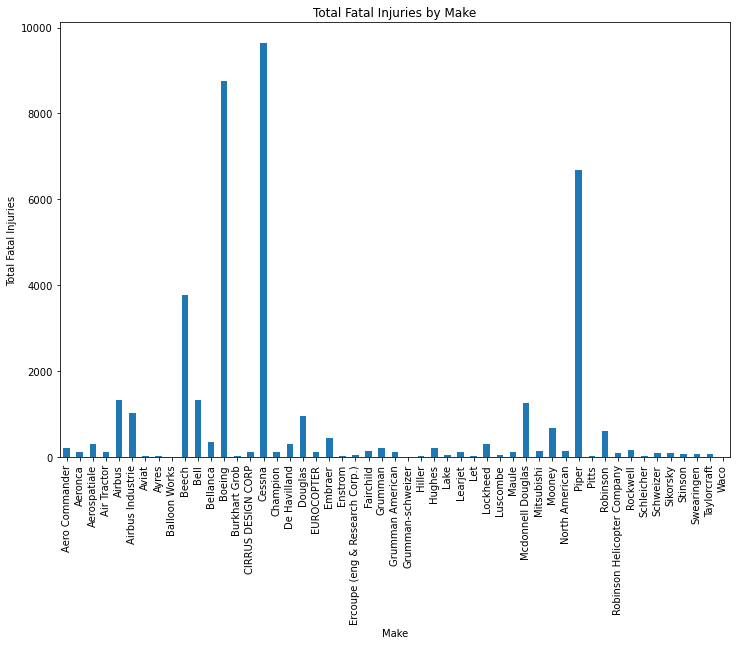

In [432]:
result.plot(kind='bar', x='Make', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make')
plt.show()

## Cleaning Models

In [433]:
df['Model'].head(10)

0           108-3
1        PA24-180
2            172M
3             112
4             501
5             DC9
6             180
7             140
8            401B
9    NAVION L-17B
Name: Model, dtype: object

In [434]:
df['Model'].value_counts()

152               2367
172               1756
172N              1164
PA-28-140          932
150                829
                  ... 
MAXAIR DRIFTER       1
206 - L3             1
LANCAIR 4P           1
MY-200A              1
SAMBA XXL            1
Name: Model, Length: 12318, dtype: int64

In [435]:
df['Model'].isna().sum()

1551

In [436]:
df['Model'].dropna(inplace=True)

In [437]:
model_counts = df['Model'].value_counts()

In [463]:
valid_model = model_counts[(model_counts > 100)].index

In [464]:
filtered_model = df[df['Model'].isin(valid_model)]

In [465]:
filtered_model['Model'].value_counts()

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
             ... 
47G           103
172E          102
PA-44-180     102
369E          101
108           101
Name: Model, Length: 141, dtype: int64

In [466]:
model_and_fatalities = filtered_model[['Model','Total.Fatal.Injuries']]

In [467]:
model_grouped = model_and_fatalities.groupby('Model')['Total.Fatal.Injuries'].sum().reset_index()

In [468]:
filtered_model_counts = filtered_model['Model'].value_counts().reset_index()
filtered_model_counts.columns = ['Model','Total Flights']

In [469]:
model_result = pd.merge(model_grouped, filtered_model_counts, on='Model', how='left', suffixes=('', ''))

In [470]:
model_result = model_result[['Model','Total Flights','Total.Fatal.Injuries']]

In [471]:
model_result

,Model,Total Flights,Total.Fatal.Injuries
0,108,101,15.0
1,120,164,33.0
2,140,402,46.0
3,150,829,127.0
4,150F,264,60.0
...,...,...,...
136,T210N,245,136.0
137,TR182,111,61.0
138,U206G,115,106.0
139,UH-12E,163,13.0


In [ ]:
result.plot(kind='bar', x='Make', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make')
plt.show()

## Engine Type Cleaning

In [447]:
df['Engine.Type'].head()

0    Reciprocating
1    Reciprocating
2    Reciprocating
3    Reciprocating
4              NaN
Name: Engine.Type, dtype: object

In [448]:
df['Engine.Type'].head(25)

0     Reciprocating
1     Reciprocating
2     Reciprocating
3     Reciprocating
4               NaN
5         Turbo Fan
6     Reciprocating
7     Reciprocating
8     Reciprocating
9     Reciprocating
10    Reciprocating
11    Reciprocating
12    Reciprocating
13    Reciprocating
14    Reciprocating
15    Reciprocating
16    Reciprocating
17    Reciprocating
18    Reciprocating
19    Reciprocating
20    Reciprocating
21    Reciprocating
22      Turbo Shaft
23    Reciprocating
24    Reciprocating
Name: Engine.Type, dtype: object

In [449]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [450]:
df['Engine.Type'].hasnans

True

In [451]:
df['Engine.Type'].isna().sum()

8536

In [452]:
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0], inplace=True)

In [453]:
df['Engine.Type'].value_counts()

Reciprocating      78066
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [454]:
df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [455]:
df['Number.of.Engines'].hasnans

True

In [456]:
df['Number.of.Engines'].isna().sum()

7543

In [457]:
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode(), inplace=True)

In [458]:
df['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

# Exploratory Data Analysis

# Conclusion

## Limitations

## Recommendations

## Next Steps